### History Time
Let's contextualise
1. Traditional NLP (Convert words into numbers followed by traditional ML) (1990-2010)
2. Word2Vec (A better approach for converting words into numbers)(2013)
3. Followed by combining Word2Vec with Deep neural networks (2014-17)
4. All the companies are racing towards a better and better model
    - Companies trying more complex neural networks, such as
        - RNN
        - LSTM
        - Bi Directional LSTM 
6. Attention is all you need !! (Transformer models - OG (BERT)) (2017-Now, i guess ^_^ )

Word2Vec with Deep neural networks
- Use word2vec, get vectors, average them together, fit a classifier
- Use keras, initialise random embeddings, train a classifier and embeddings together 
- Use keras, use Word2vec embeddings, tell keras to train the classifier and not touch the embeddings
- Use keras, use Word2vec embeddings, tell keras to train the classifier and the embeddings on top

# Named Entity Recognition
- Dictionary Based
- Rule Based 
- ML Based
- Deep learning Based

### Recurrent Neural Networks 
Create for sequencial data 

![](https://karpathy.github.io/assets/rnn/diags.jpeg)

### Architecture of a RNN

![](https://miro.medium.com/v2/resize:fit:224/format:webp/1*Jjtbhw57TVmnYFB6coxE7Q.png)

### How is this different than a normal nerual network
![](https://miro.medium.com/v2/resize:fit:500/format:webp/1*Ek9T_0gEyHtiwNCu6jU20w.gif)

# But, what about NLP 
How will RNN's and LSTM's be used with text

In [2]:
text = (open("Harry Potter 1 - Sorcerer's Stone.txt").read())
text = text.lower()

In [3]:
text

'harry potter and the sorcerer\'s stone\n\n\nchapter one\n\nthe boy who lived\n\nmr. and mrs. dursley, of number four, privet drive, were proud to say\nthat they were perfectly normal, thank you very much. they were the last\npeople you\'d expect to be involved in anything strange or mysterious,\nbecause they just didn\'t hold with such nonsense.\n\nmr. dursley was the director of a firm called grunnings, which made\ndrills. he was a big, beefy man with hardly any neck, although he did\nhave a very large mustache. mrs. dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors. the dursleys had a small son called dudley and in their\nopinion there was no finer boy anywhere.\n\nthe dursleys had everything they wanted, but they also had a secret, and\ntheir greatest fear was that somebody would discover it. they didn\'t\nthink they could bear it if anyone foun

### Create character mappings

In [170]:
characters = sorted(list(set(text)))
characters

['\t',
 '\n',
 ' ',
 '!',
 '"',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 '\\',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '~']

### Let's make a dictionary
Showing letters to numbers and vice versa

In [5]:
n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

In [6]:
n_to_char

{0: '\t',
 1: '\n',
 2: ' ',
 3: '!',
 4: '"',
 5: "'",
 6: '(',
 7: ')',
 8: '*',
 9: ',',
 10: '-',
 11: '.',
 12: '0',
 13: '1',
 14: '2',
 15: '3',
 16: '4',
 17: '5',
 18: '6',
 19: '7',
 20: '8',
 21: '9',
 22: ':',
 23: ';',
 24: '?',
 25: '\\',
 26: 'a',
 27: 'b',
 28: 'c',
 29: 'd',
 30: 'e',
 31: 'f',
 32: 'g',
 33: 'h',
 34: 'i',
 35: 'j',
 36: 'k',
 37: 'l',
 38: 'm',
 39: 'n',
 40: 'o',
 41: 'p',
 42: 'q',
 43: 'r',
 44: 's',
 45: 't',
 46: 'u',
 47: 'v',
 48: 'w',
 49: 'x',
 50: 'y',
 51: 'z',
 52: '~'}

We have used character level mappings and not word mappings. 

### Preparing the data for model structure in Keras

In [7]:
# extracted sequences
X = []   
# the target: follow up character for each sequence in X
Y = []   

In [8]:
length = len(text)
length

439742

In [9]:
seq_length = 100

for i in range(0, length - seq_length, 1):
    # Creating my X as 100 letters
    sequence = text[i:i + seq_length]
    # Creating my y as the letter that comes after my 100 letters
    label = text[i + seq_length]
    
    # Storing my X
    X.append([char_to_n[char] for char in sequence])
    # Storing my y
    Y.append(char_to_n[label])
    
print('Number of extracted sequences:', len(X))

Number of extracted sequences: 439642


### Let's see our data

In [10]:
print(X[0])

[33, 26, 43, 43, 50, 2, 41, 40, 45, 45, 30, 43, 2, 26, 39, 29, 2, 45, 33, 30, 2, 44, 40, 43, 28, 30, 43, 30, 43, 5, 44, 2, 44, 45, 40, 39, 30, 1, 1, 1, 28, 33, 26, 41, 45, 30, 43, 2, 40, 39, 30, 1, 1, 45, 33, 30, 2, 27, 40, 50, 2, 48, 33, 40, 2, 37, 34, 47, 30, 29, 1, 1, 38, 43, 11, 2, 26, 39, 29, 2, 38, 43, 44, 11, 2, 29, 46, 43, 44, 37, 30, 50, 9, 2, 40, 31, 2, 39, 46, 38]


In [11]:
Y[0]

27

In [12]:
text[0:101]

"harry potter and the sorcerer's stone\n\n\nchapter one\n\nthe boy who lived\n\nmr. and mrs. dursley, of numb"

### We now have our X train and Y train

```seq_length``` is the length of the sequence of characters that we want to consider before predicting a particular character.

```
+--------------+-------+
|      X       |   Y   |
+--------------+-------+
| [h, e, l, l] | [o]   |
| [e, l, l, o] | [ ]   |
| [l, l, o,  ] | [i]   |
| [l, o,  , i] | [n]   |
| ...          | ...   |
+--------------+-------+
```

### Required format

Now, RNN's/LSTMs accept input in the form of (```number_of_sequences```, ```length_of_sequence```, ```number_of_features```) which is not the current format of the arrays. Also, we need to transform the array Y into a one-hot encoded format.

In [14]:
import numpy as np
# Reshaping into appropriate format
X_modified = np.reshape(X, (len(X), seq_length, 1))

# What's going on here, what are you doing
# I am normalising
X_modified = X_modified / float(len(characters))

In [15]:
X_modified

array([[[0.62264151],
        [0.49056604],
        [0.81132075],
        ...,
        [0.73584906],
        [0.86792453],
        [0.71698113]],

       [[0.49056604],
        [0.81132075],
        [0.81132075],
        ...,
        [0.86792453],
        [0.71698113],
        [0.50943396]],

       [[0.81132075],
        [0.81132075],
        [0.94339623],
        ...,
        [0.71698113],
        [0.50943396],
        [0.56603774]],

       ...,

       [[0.73584906],
        [0.75471698],
        [0.8490566 ],
        ...,
        [0.56603774],
        [0.03773585],
        [0.56603774]],

       [[0.75471698],
        [0.8490566 ],
        [0.03773585],
        ...,
        [0.03773585],
        [0.56603774],
        [0.73584906]],

       [[0.8490566 ],
        [0.03773585],
        [0.49056604],
        ...,
        [0.56603774],
        [0.73584906],
        [0.54716981]]])

In [16]:
X_modified[0].shape

(100, 1)

In [17]:
from tensorflow.keras.utils import to_categorical

Y_modified = to_categorical(Y)

2024-04-16 07:22:44.704045: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 07:22:45.386555: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [18]:
Y_modified

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Training 

In [21]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [22]:
# Initialise my model
model = Sequential()


# Add a RNN layer of size 10
model.add(SimpleRNN(50, 
                    input_shape=(X_modified.shape[1], X_modified.shape[2]), 
                    return_sequences=True))

model.add(Dropout(0.2))

# Adding 1 more RNN layer
model.add(SimpleRNN(10))

model.add(Dropout(0.2))

model.add(Dense(53, activation='softmax'))

2024-04-16 07:23:45.481137: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-16 07:23:45.499113: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100, 50)        │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 10)             │           610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 53)             │           583 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,793 (14.82 KB)

 Trainable params: 3,793 (14.82 KB)

 Non-trainable params: 0 (0.00 B)

Training .............

In [27]:
model.fit(X_modified, Y_modified, epochs=10, batch_size=128)

Epoch 1/10
3435/3435 ━━━━━━━━━━━━━━━━━━━━ 87s 25ms/step - loss: 3.1360
Epoch 2/10
 295/3435 ━━━━━━━━━━━━━━━━━━━━ 1:18 25ms/step - loss: 2.8866

KeyboardInterrupt: 

### Generate some text using random seeds of text

In [ ]:
#random row from the X array
start = 10   
string_mapped = list(X[start])
full_string = [n_to_char[value] for value in string_mapped]

In [ ]:
print(string_mapped)

In [ ]:
print(full_string)

In [ ]:
print(' '.join(full_string))

### But, how about word level

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Activation
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import RegexpTokenizer

2024-04-16 09:06:46.559920: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 09:06:47.497949: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
text

'harry potter and the sorcerer\'s stone\n\n\nchapter one\n\nthe boy who lived\n\nmr. and mrs. dursley, of number four, privet drive, were proud to say\nthat they were perfectly normal, thank you very much. they were the last\npeople you\'d expect to be involved in anything strange or mysterious,\nbecause they just didn\'t hold with such nonsense.\n\nmr. dursley was the director of a firm called grunnings, which made\ndrills. he was a big, beefy man with hardly any neck, although he did\nhave a very large mustache. mrs. dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors. the dursleys had a small son called dudley and in their\nopinion there was no finer boy anywhere.\n\nthe dursleys had everything they wanted, but they also had a secret, and\ntheir greatest fear was that somebody would discover it. they didn\'t\nthink they could bear it if anyone foun

In [13]:
print(text)

harry potter and the sorcerer's stone


chapter one

the boy who lived

mr. and mrs. dursley, of number four, privet drive, were proud to say
that they were perfectly normal, thank you very much. they were the last
people you'd expect to be involved in anything strange or mysterious,
because they just didn't hold with such nonsense.

mr. dursley was the director of a firm called grunnings, which made
drills. he was a big, beefy man with hardly any neck, although he did
have a very large mustache. mrs. dursley was thin and blonde and had
nearly twice the usual amount of neck, which came in very useful as she
spent so much of her time craning over garden fences, spying on the
neighbors. the dursleys had a small son called dudley and in their
opinion there was no finer boy anywhere.

the dursleys had everything they wanted, but they also had a secret, and
their greatest fear was that somebody would discover it. they didn't
think they could bear it if anyone found out about the potters. mr

### Tokenizing

In [39]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

### Getting words

In [40]:
# Initialise a tokenizer
tokenizer = Tokenizer()

# Fit my tokenizer
tokenizer.fit_on_texts(words)

In [41]:
unique_word_index = tokenizer.word_index

In [42]:
unique_word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'he': 4,
 'a': 5,
 'harry': 6,
 'of': 7,
 'was': 8,
 'it': 9,
 'you': 10,
 's': 11,
 'in': 12,
 'his': 13,
 'i': 14,
 't': 15,
 'said': 16,
 'had': 17,
 'they': 18,
 'that': 19,
 'on': 20,
 'at': 21,
 'as': 22,
 'him': 23,
 'but': 24,
 'ron': 25,
 'with': 26,
 'all': 27,
 'what': 28,
 'out': 29,
 'up': 30,
 'for': 31,
 'hagrid': 32,
 'be': 33,
 'them': 34,
 'there': 35,
 'were': 36,
 'have': 37,
 'd': 38,
 'hermione': 39,
 'we': 40,
 'back': 41,
 'one': 42,
 'she': 43,
 'this': 44,
 'if': 45,
 'from': 46,
 'so': 47,
 'not': 48,
 'about': 49,
 'into': 50,
 'an': 51,
 'me': 52,
 'their': 53,
 'know': 54,
 'been': 55,
 'off': 56,
 'who': 57,
 'got': 58,
 'didn': 59,
 'could': 60,
 'no': 61,
 'like': 62,
 'get': 63,
 'down': 64,
 'professor': 65,
 'just': 66,
 'her': 67,
 'see': 68,
 've': 69,
 'when': 70,
 'is': 71,
 'don': 72,
 'very': 73,
 'snape': 74,
 'over': 75,
 'looked': 76,
 'do': 77,
 'now': 78,
 'then': 79,
 'll': 80,
 'dumbledore': 81,
 'are': 8

In [44]:
len(unique_word_index)

5777

In [45]:
tokenizer.index_word[450]

'somewhere'

### Preparing data

In [46]:
SEQUENCE_LENGTH = 15
prev_words = []
next_words = []
for i in range(len(words) - SEQUENCE_LENGTH):
    prev_words.append(words[i:i + SEQUENCE_LENGTH])
    next_words.append(words[i + SEQUENCE_LENGTH])

In [47]:
tokenizer.index_word[5777]

'spreading'

In [307]:
unique_word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'he': 4,
 'a': 5,
 'harry': 6,
 'of': 7,
 'was': 8,
 'it': 9,
 'you': 10,
 's': 11,
 'in': 12,
 'his': 13,
 'i': 14,
 't': 15,
 'said': 16,
 'had': 17,
 'they': 18,
 'that': 19,
 'on': 20,
 'at': 21,
 'as': 22,
 'him': 23,
 'but': 24,
 'ron': 25,
 'with': 26,
 'all': 27,
 'what': 28,
 'out': 29,
 'up': 30,
 'for': 31,
 'hagrid': 32,
 'be': 33,
 'them': 34,
 'there': 35,
 'were': 36,
 'have': 37,
 'd': 38,
 'hermione': 39,
 'we': 40,
 'back': 41,
 'one': 42,
 'she': 43,
 'this': 44,
 'if': 45,
 'from': 46,
 'so': 47,
 'not': 48,
 'about': 49,
 'into': 50,
 'an': 51,
 'me': 52,
 'their': 53,
 'know': 54,
 'been': 55,
 'off': 56,
 'who': 57,
 'got': 58,
 'didn': 59,
 'could': 60,
 'no': 61,
 'like': 62,
 'get': 63,
 'down': 64,
 'professor': 65,
 'just': 66,
 'her': 67,
 'see': 68,
 've': 69,
 'when': 70,
 'is': 71,
 'don': 72,
 'very': 73,
 'snape': 74,
 'over': 75,
 'looked': 76,
 'do': 77,
 'now': 78,
 'then': 79,
 'll': 80,
 'dumbledore': 81,
 'are': 8

In [228]:
prev_words

[['harry', 'potter', 'and', 'the', 'sorcerer'],
 ['potter', 'and', 'the', 'sorcerer', 's'],
 ['and', 'the', 'sorcerer', 's', 'stone'],
 ['the', 'sorcerer', 's', 'stone', 'chapter'],
 ['sorcerer', 's', 'stone', 'chapter', 'one'],
 ['s', 'stone', 'chapter', 'one', 'the'],
 ['stone', 'chapter', 'one', 'the', 'boy'],
 ['chapter', 'one', 'the', 'boy', 'who'],
 ['one', 'the', 'boy', 'who', 'lived'],
 ['the', 'boy', 'who', 'lived', 'mr'],
 ['boy', 'who', 'lived', 'mr', 'and'],
 ['who', 'lived', 'mr', 'and', 'mrs'],
 ['lived', 'mr', 'and', 'mrs', 'dursley'],
 ['mr', 'and', 'mrs', 'dursley', 'of'],
 ['and', 'mrs', 'dursley', 'of', 'number'],
 ['mrs', 'dursley', 'of', 'number', 'four'],
 ['dursley', 'of', 'number', 'four', 'privet'],
 ['of', 'number', 'four', 'privet', 'drive'],
 ['number', 'four', 'privet', 'drive', 'were'],
 ['four', 'privet', 'drive', 'were', 'proud'],
 ['privet', 'drive', 'were', 'proud', 'to'],
 ['drive', 'were', 'proud', 'to', 'say'],
 ['were', 'proud', 'to', 'say', 'that'

In [229]:
next_words

['s',
 'stone',
 'chapter',
 'one',
 'the',
 'boy',
 'who',
 'lived',
 'mr',
 'and',
 'mrs',
 'dursley',
 'of',
 'number',
 'four',
 'privet',
 'drive',
 'were',
 'proud',
 'to',
 'say',
 'that',
 'they',
 'were',
 'perfectly',
 'normal',
 'thank',
 'you',
 'very',
 'much',
 'they',
 'were',
 'the',
 'last',
 'people',
 'you',
 'd',
 'expect',
 'to',
 'be',
 'involved',
 'in',
 'anything',
 'strange',
 'or',
 'mysterious',
 'because',
 'they',
 'just',
 'didn',
 't',
 'hold',
 'with',
 'such',
 'nonsense',
 'mr',
 'dursley',
 'was',
 'the',
 'director',
 'of',
 'a',
 'firm',
 'called',
 'grunnings',
 'which',
 'made',
 'drills',
 'he',
 'was',
 'a',
 'big',
 'beefy',
 'man',
 'with',
 'hardly',
 'any',
 'neck',
 'although',
 'he',
 'did',
 'have',
 'a',
 'very',
 'large',
 'mustache',
 'mrs',
 'dursley',
 'was',
 'thin',
 'and',
 'blonde',
 'and',
 'had',
 'nearly',
 'twice',
 'the',
 'usual',
 'amount',
 'of',
 'neck',
 'which',
 'came',
 'in',
 'very',
 'useful',
 'as',
 'she',
 'spe

### Storing features and labels
X will be used to get the features and Y to get the labels associated with them.


In [48]:
X = np.zeros((len(prev_words), SEQUENCE_LENGTH, len(unique_word_index) + 1), dtype=bool)
Y = np.zeros((len(next_words), len(unique_word_index) + 1), dtype=bool)

In [49]:
X

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [50]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [51]:
X.shape

(80633, 15, 5778)

In [52]:
len(prev_words)

80633

In [53]:
Y.shape

(80633, 5778)

In [29]:
len(unique_word_index)

5871

In [30]:
unique_word_index['mr.']

KeyError: 'mr.'

In [120]:
tokenizer.index_word[5777]

'spreading'

In [237]:
X[0,0,5777]

False

### Converting my data to escentially countvectorizer data

In [54]:
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        # |word = unique_word_index[each_word]
        # print(i,j,word)
        X[i, j, unique_word_index[each_word]] = 1
    # word = unique_word_index[next_words[i]]
    Y[i, unique_word_index[next_words[i]]] = 1

In [55]:
X

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False,  True, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False,  True, ..., False, False, False],
        [False,  True, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False,  True, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [56]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
prev_word

In [295]:
X[0][0]

array([False, False, False, ..., False, False, False])

In [296]:
X[0].shape

(5, 5778)

### Converted my data

### Let's look at my data

In [58]:
unique_word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'he': 4,
 'a': 5,
 'harry': 6,
 'of': 7,
 'was': 8,
 'it': 9,
 'you': 10,
 's': 11,
 'in': 12,
 'his': 13,
 'i': 14,
 't': 15,
 'said': 16,
 'had': 17,
 'they': 18,
 'that': 19,
 'on': 20,
 'at': 21,
 'as': 22,
 'him': 23,
 'but': 24,
 'ron': 25,
 'with': 26,
 'all': 27,
 'what': 28,
 'out': 29,
 'up': 30,
 'for': 31,
 'hagrid': 32,
 'be': 33,
 'them': 34,
 'there': 35,
 'were': 36,
 'have': 37,
 'd': 38,
 'hermione': 39,
 'we': 40,
 'back': 41,
 'one': 42,
 'she': 43,
 'this': 44,
 'if': 45,
 'from': 46,
 'so': 47,
 'not': 48,
 'about': 49,
 'into': 50,
 'an': 51,
 'me': 52,
 'their': 53,
 'know': 54,
 'been': 55,
 'off': 56,
 'who': 57,
 'got': 58,
 'didn': 59,
 'could': 60,
 'no': 61,
 'like': 62,
 'get': 63,
 'down': 64,
 'professor': 65,
 'just': 66,
 'her': 67,
 'see': 68,
 've': 69,
 'when': 70,
 'is': 71,
 'don': 72,
 'very': 73,
 'snape': 74,
 'over': 75,
 'looked': 76,
 'do': 77,
 'now': 78,
 'then': 79,
 'll': 80,
 'dumbledore': 81,
 'are': 8

In [298]:
pd.DataFrame(X[0],columns= temp)

the    and     to     he      a  harry     of    was     it    you  ...  \
0  False  False  False  False  False  False   True  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False   True  False  False  False  False  False  False  False  ...   
3  False   True  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

    gate   twos  threes  alarming  squealed  mustached  manner  holiday  \
0  False  False   False     False     False      False   False    False   
1  False  False   False     False     False      False   False    False   
2  False  False   False     False     False      False   False    False   
3  False  False   False     False     False      False   False    False   
4  False  False   False     False     False      False   False    False   

   spreading   test  
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  

[5 rows x 5778 columns]

In [300]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# My X is ready, so is Y
Let's make a model

### Building our model

In [59]:
# Initialise a model
model = Sequential()

# Adding a LSTM layer
model.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, len(unique_word_index) + 1)))

# Adding a dense layer
model.add(Dense(len(unique_word_index) + 1))

# Adding an activation function
model.add(Activation('softmax'))

model.summary()

2024-04-16 09:11:56.280346: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-16 09:11:56.417189: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │     3,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5778)           │       745,362 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 5778)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,769,746 (14.38 MB)

 Trainable params: 3,769,746 (14.38 MB)

 Non-trainable params: 0 (0.00 B)

### Setting up my optimizer

In [60]:
from keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.01)

In [61]:
# Compiling my model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │     3,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5778)           │       745,362 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 5778)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,769,746 (14.38 MB)

 Trainable params: 3,769,746 (14.38 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=10, shuffle=True)

2024-04-16 09:16:10.334706: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6639008670 exceeds 10% of free system memory.


Epoch 1/10
599/599 ━━━━━━━━━━━━━━━━━━━━ 75s 124ms/step - accuracy: 0.1274 - loss: 5.5310 - val_accuracy: 0.1076 - val_loss: 5.8049
Epoch 2/10
599/599 ━━━━━━━━━━━━━━━━━━━━ 72s 120ms/step - accuracy: 0.1394 - loss: 5.3327 - val_accuracy: 0.1062 - val_loss: 5.7805
Epoch 3/10
599/599 ━━━━━━━━━━━━━━━━━━━━ 71s 119ms/step - accuracy: 0.1533 - loss: 5.1428 - val_accuracy: 0.1153 - val_loss: 5.7381
Epoch 4/10
599/599 ━━━━━━━━━━━━━━━━━━━━ 72s 120ms/step - accuracy: 0.1659 - loss: 5.0072 - val_accuracy: 0.1124 - val_loss: 5.7340
Epoch 5/10
599/599 ━━━━━━━━━━━━━━━━━━━━ 71s 119ms/step - accuracy: 0.1801 - loss: 4.8342 - val_accuracy: 0.1124 - val_loss: 5.7451
Epoch 6/10
599/599 ━━━━━━━━━━━━━━━━━━━━ 71s 118ms/step - accuracy: 0.1930 - loss: 4.6599 - val_accuracy: 0.1141 - val_loss: 5.8443
Epoch 7/10
599/599 ━━━━━━━━━━━━━━━━━━━━ 71s 119ms/step - accuracy: 0.2146 - loss: 4.4905 - val_accuracy: 0.1181 - val_loss: 5.8279
Epoch 8/10
599/599 ━━━━━━━━━━━━━━━━━━━━ 72s 121ms/step - accuracy: 0.2313 - loss: 4

In [65]:
hst = history.history

In [66]:
hst

{'accuracy': [0.1269957274198532,
  0.1409119963645935,
  0.15276563167572021,
  0.16552002727985382,
  0.17763476073741913,
  0.19330035150051117,
  0.20884844660758972,
  0.2272816300392151,
  0.24831268191337585,
  0.2713150084018707],
 'loss': [5.52841329574585,
  5.350680828094482,
  5.189765453338623,
  5.034654140472412,
  4.883448123931885,
  4.724949359893799,
  4.5694193840026855,
  4.398350715637207,
  4.218631267547607,
  4.038820266723633],
 'val_accuracy': [0.1076388880610466,
  0.1061507910490036,
  0.1153273805975914,
  0.112351194024086,
  0.112351194024086,
  0.1140872985124588,
  0.1180555522441864,
  0.112351194024086,
  0.110863097012043,
  0.1068948432803154],
 'val_loss': [5.80491304397583,
  5.780515193939209,
  5.738101959228516,
  5.733974933624268,
  5.745059967041016,
  5.8442583084106445,
  5.827859878540039,
  5.938951015472412,
  6.099661827087402,
  6.133667945861816]}

### Evaluating the model

In [68]:
plt.plot(hst['accuracy'])
plt.plot(hst['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

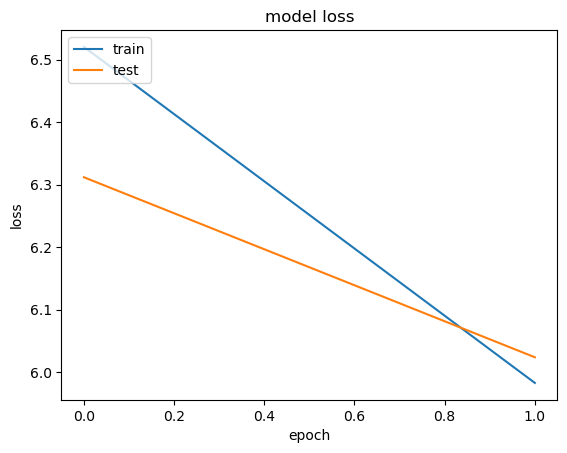

In [150]:
plt.plot(hst['loss'])
plt.plot(hst['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Getting next word

In [85]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(unique_word_index) + 1))
    for t, word in enumerate(text):
        x[0, t, unique_word_index[word]] = 1
    return x

In [86]:
prepare_input(prev_words[0])

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]])

In [87]:
len(prev_words[0])

15

In [88]:
temp_vector = prepare_input(prev_words[0])

In [89]:
temp_vector.shape

(1, 15, 5778)

In [100]:
model.predict(temp_vector)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([8.1399856e-05, 1.3938445e-01, 3.0819567e-05, ..., 7.8077792e-05,
       8.2392682e-05, 7.3929477e-05], dtype=float32)

In [101]:
temp = model.predict(temp_vector)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [105]:
temp = model.predict(temp_vector, verbose=0)[0]

In [107]:
temp

array([8.1399856e-05, 1.3938445e-01, 3.0819567e-05, ..., 7.8077792e-05,
       8.2392682e-05, 7.3929477e-05], dtype=float32)

In [108]:
preds = np.log(temp)
exp_preds = np.exp(temp)

In [109]:
preds = exp_preds / np.sum(exp_preds)

In [110]:
preds

array([0.00017305, 0.00019892, 0.00017305, ..., 0.00017305, 0.00017305,
       0.00017305], dtype=float32)

In [111]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [146]:
def prepare_input(text):
    # Getting my text to vectors
    x = np.zeros((1, SEQUENCE_LENGTH, len(unique_word_index) + 1))
    for t, word in enumerate(text):
        x[0, t, unique_word_index[word]] = 1
    return x

def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

def predict_completions(text, n=3):
    # Getting my text to vectors
    x = prepare_input(text)
    print('Got input')

    # Getting nad storing my predictions
    preds = model.predict(x, verbose=0)[0]
    print('Got prediction')
    print(preds)

    # Getting the word from the prediction
    next_indices = sample(preds, n)
    print('Got next indices')

    # This part i will have to explain
    return [tokenizer.index_word[idx] + predict_completion(text[1:] + tokenizer.index_word[idx]) for idx in next_indices]

quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [147]:
# Convert my text to vectors
text_temp = 'harry potter and the sorcerer s stone chapter one the boy and'

# Tokenizing them 
text_temp = text_temp.split(' ')

text_temp

['harry',
 'potter',
 'and',
 'the',
 'sorcerer',
 's',
 'stone',
 'chapter',
 'one',
 'the',
 'boy',
 'and']

In [148]:
predict_completions(text_temp)

Got input
Got prediction
[1.6189715e-05 1.9649649e-02 1.2691487e-02 ... 1.5992740e-05 1.6207914e-05
 1.6369249e-05]
Got next indices


NameError: name 'predict_completion' is not defined

In [129]:
# Getting my text to vectors
x = prepare_input(text_temp)

In [131]:
# Getting nad storing my predictions
preds = model.predict(x, verbose=0)[0]
print('Got prediction')
print(preds)

Got prediction
[1.6189715e-05 1.9649649e-02 1.2691487e-02 ... 1.5992740e-05 1.6207914e-05
 1.6369249e-05]


In [134]:
# Getting the word from the prediction
next_indices = sample(preds, 15)
print('Got next indices')

Got next indices


In [136]:
next_indices

[50, 30, 64, 29, 25, 103, 56, 1, 23, 6, 43, 34, 75, 53, 96]

In [140]:
tokenizer.index_word[30]

'up'

In [143]:
' '.join([tokenizer.index_word[i] for i in next_indices])

'into up down out ron neville off the him harry she them over their through'

In [ ]:
'harry potter and the sorcerer s stone chapter one the boy and'

In [133]:
# This part i will have to explain
[indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

NameError: name 'indices_char' is not defined

In [119]:
predict_completions('harry potter and the sorcerer s stone chapter one the boy and'.split(' '))

Got input


2024-04-16 09:44:53.831897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [1,5777], In[1]: [5778,512]
	 [[{{function_node sequential_1_lstm_1_while_body_110490}}{{node sequential_1/lstm_1/while/lstm_cell_1/MatMul}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1/lstm_1/while/lstm_cell_1/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/ksharp/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/ksharp/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/ksharp/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_46911/2929170113.py", line 1, in <module>

  File "/tmp/ipykernel_46911/3088020419.py", line 21, in predict_completions

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 519, in predict

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 217, in one_step_on_data_distributed

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 206, in one_step_on_data

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 98, in predict_step

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py", line 826, in __call__

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/models/sequential.py", line 206, in call

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py", line 199, in call

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/ops/function.py", line 151, in _run_through_graph

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py", line 583, in call

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py", line 826, in __call__

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/lstm.py", line 560, in call

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py", line 398, in call

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/lstm.py", line 555, in inner_loop

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py", line 338, in inner_loop

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/rnn.py", line 428, in rnn

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/rnn.py", line 411, in _step

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py", line 330, in step

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py", line 826, in __call__

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/lstm.py", line 264, in call

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/ops/numpy.py", line 3570, in matmul

  File "/home/ksharp/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/numpy.py", line 475, in matmul

Matrix size-incompatible: In[0]: [1,5777], In[1]: [5778,512]
	 [[{{node sequential_1/lstm_1/while/lstm_cell_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_110580]

In [92]:
for q in quotes:
    seq = q[:50].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of love, but a lack of 


KeyError: ' '

In [96]:
' '.join(prev_words[0])

'harry potter and the sorcerer s stone chapter one the boy who lived mr and'

In [114]:
import heapq 

### NER

In [151]:
import pandas as pd
data = pd.read_csv("ner_dataset.csv", encoding="latin1")

In [152]:
data

Sentence #           Word  POS Tag
0        Sentence: 1      Thousands  NNS   O
1                NaN             of   IN   O
2                NaN  demonstrators  NNS   O
3                NaN           have  VBP   O
4                NaN        marched  VBN   O
...              ...            ...  ...  ..
1048570          NaN           they  PRP   O
1048571          NaN      responded  VBD   O
1048572          NaN             to   TO   O
1048573          NaN            the   DT   O
1048574          NaN         attack   NN   O

[1048575 rows x 4 columns]

In [161]:
data = data.fillna(method="ffill")
data.head(40)

/tmp/ipykernel_46911/2336367086.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Sentence #           Word  POS    Tag
0   Sentence: 1      Thousands  NNS      O
1   Sentence: 1             of   IN      O
2   Sentence: 1  demonstrators  NNS      O
3   Sentence: 1           have  VBP      O
4   Sentence: 1        marched  VBN      O
5   Sentence: 1        through   IN      O
6   Sentence: 1         London  NNP  B-geo
7   Sentence: 1             to   TO      O
8   Sentence: 1        protest   VB      O
9   Sentence: 1            the   DT      O
10  Sentence: 1            war   NN      O
11  Sentence: 1             in   IN      O
12  Sentence: 1           Iraq  NNP  B-geo
13  Sentence: 1            and   CC      O
14  Sentence: 1         demand   VB      O
15  Sentence: 1            the   DT      O
16  Sentence: 1     withdrawal   NN      O
17  Sentence: 1             of   IN      O
18  Sentence: 1        British   JJ  B-gpe
19  Sentence: 1         troops  NNS      O
20  Sentence: 1           from   IN      O
21  Sentence: 1           that   DT      O
22  Sentence: 1        country   NN      O
23  Sentence: 1              .    .      O
24  Sentence: 2       Families  NNS      O
25  Sentence: 2             of   IN      O
26  Sentence: 2       soldiers  NNS      O
27  Sentence: 2         killed  VBN      O
28  Sentence: 2             in   IN      O
29  Sentence: 2            the   DT      O
30  Sentence: 2       conflict   NN      O
31  Sentence: 2         joined  VBD      O
32  Sentence: 2            the   DT      O
33  Sentence: 2     protesters  NNS      O
34  Sentence: 2            who   WP      O
35  Sentence: 2        carried  VBD      O
36  Sentence: 2        banners  NNS      O
37  Sentence: 2           with   IN      O
38  Sentence: 2           such   JJ      O
39  Sentence: 2        slogans  NNS      O

In [156]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35177
Unique tags in corpus: 17


In [157]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)

In [158]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)

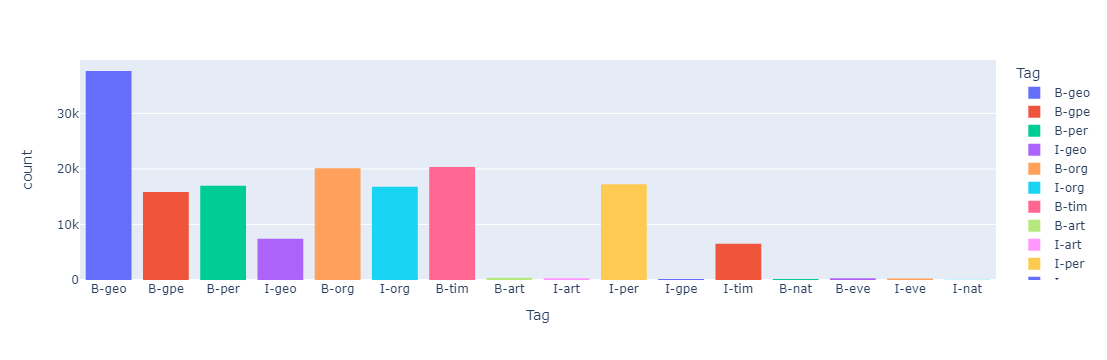

In [160]:
import plotly.express as px

fig = px.histogram(data[~data.Tag.str.contains("O")], x="Tag",color="Tag")
fig.show()

In [164]:
import tqdm
def sentence_integrate(data):
  agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
  return data.groupby('Sentence #').apply(agg_func).tolist()
  
sentences=sentence_integrate(data)
  
sentences[1]

[('Iranian', 'JJ', 'B-gpe'),
 ('officials', 'NNS', 'O'),
 ('say', 'VBP', 'O'),
 ('they', 'PRP', 'O'),
 ('expect', 'VBP', 'O'),
 ('to', 'TO', 'O'),
 ('get', 'VB', 'O'),
 ('access', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('sealed', 'JJ', 'O'),
 ('sensitive', 'JJ', 'O'),
 ('parts', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('plant', 'NN', 'O'),
 ('Wednesday', 'NNP', 'B-tim'),
 (',', ',', 'O'),
 ('after', 'IN', 'O'),
 ('an', 'DT', 'O'),
 ('IAEA', 'NNP', 'B-org'),
 ('surveillance', 'NN', 'O'),
 ('system', 'NN', 'O'),
 ('begins', 'VBZ', 'O'),
 ('functioning', 'VBG', 'O'),
 ('.', '.', 'O')]

In [162]:
# Build a vocabulary for words and tags 
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

word2idx
tag2idx

{'I-tim': 0,
 'B-geo': 1,
 'B-tim': 2,
 'B-nat': 3,
 'I-gpe': 4,
 'B-eve': 5,
 'I-eve': 6,
 'O': 7,
 'I-nat': 8,
 'I-geo': 9,
 'B-art': 10,
 'I-art': 11,
 'I-org': 12,
 'B-org': 13,
 'I-per': 14,
 'B-gpe': 15,
 'B-per': 16}

Padding the Input Sentence to the Same Length:

In [163]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

### Building and compiling

In [165]:

#split into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [166]:
#build model
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import InputLayer, TimeDistributed, SpatialDropout1D, Bidirectional
from tensorflow import keras

In [167]:
model = keras.Sequential()
model.add(InputLayer((max_len)))
model.add(Embedding(input_dim=num_words, output_dim=max_len, input_length=max_len))
model.add(SpatialDropout1D(0.1))
model.add( Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))

#model summary
model.summary()

ValueError: Cannot convert '50' to a shape.

In [ ]:
#show model plot
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='LR', expand_nested=True, dpi=300,
)

#compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])